
*** a) Dataframe ex3.csv:
        post1  post2  post3  post4
word                             
ice        4      4      6      2
snow       6      1      0      5
tahoe      3      0      0      5
goal       0      6      5      1
puck       0      4      5      0 


*** b) Phân tích SVD:
- Ma trận U( 5 ,  5 ): 
 [[-0.62610079  0.01852561  0.6259093   0.23487748 -0.40090488]
 [-0.35134826 -0.67829097  0.0779915  -0.56006159  0.311005  ]
 [-0.21940528 -0.51980146 -0.50346468  0.6484906  -0.08747016]
 [-0.51965373  0.37026259 -0.59046979 -0.38005352 -0.31586445]
 [-0.40788911  0.36371724 -0.00485878  0.25726028  0.79695031]] 

- Eigenvalues: [13.3221948   9.2609512   2.41918664  1.37892883] 

- Ma trận VT( 4 ,  4 ): 
 [[-0.39563365 -0.57086917 -0.6301003  -0.34721178]
 [-0.59983555  0.33174302  0.4082791  -0.60286986]
 [ 0.60400142 -0.40535325  0.32193174 -0.60599586]
 [-0.34475152 -0.63225288  0.57675103  0.38569539]] 


*** c) NEW dataframe (using only the first two components):
     

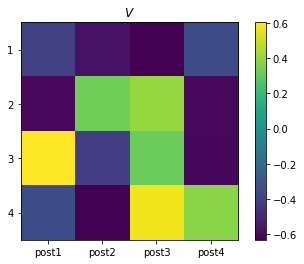

In [10]:
"""=============================================================================
Ex3: SVD
    Câu 1: 
        a) Cho tập tin ex3.csv. Đọc tập tin vào dataframe
        b) Phân tích SVD: U, s, VT từ dataframe
        c) Tạo dataframe mới từ U, s, VT, nhận xét và rút gọn thành phần, nếu có thể
        d) Tìm error nếu có rút gọn thành phần 
============================================================================="""
import numpy  as np
import pandas as pd

## a) Đọc tập tin ex3.csv vào dataframe
# folder = "\"
df     = pd.read_csv('ex3.csv', index_col = 0)
print('\n*** a) Dataframe ex3.csv:\n', df, '\n')

## b) Phân tích SVD: U, s, VT
print('\n*** b) Phân tích SVD:')
U, s, VT = np.linalg.svd(df)

print('- Ma trận U(', U.shape[1], ', ', U.shape[0], '): \n', U, '\n')
print('- Eigenvalues:', s, '\n')
print('- Ma trận VT(', VT.shape[1], ', ', VT.shape[0], '): \n', VT, '\n')

## c) Tạo dataframe mới từ U, s, VT
col_headers = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
new_df = pd.DataFrame(VT, columns = col_headers)
A_approx = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])

print('\n*** c) NEW dataframe (using only the first two components):')
print(pd.DataFrame(A_approx, index = words, columns = col_headers))

## d) Tìm error
print("\n*** d) Error from actual value:")
print(df - A_approx)

## e) Hiển thị
import matplotlib.pyplot as plt

plt.imshow(VT, interpolation = 'none')
plt.xticks(range(len(col_headers)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(col_headers)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar()




In [11]:
"""=============================================================================
Ex3: SVD
    Câu 2: 
        a) Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
        b) Phân tích SVD: U, s, VT từ dataframe
        c) Tạo dataframe mới từ U, s, VT, nhận xét và rút gọn thành phần, nếu có thể
        d) Tìm error nếu có rút gọn thành phần 
        e) Tái cấu trúc dataframe theo U, s, VT (giữ nguyên tất cả các thành phần)
============================================================================="""
import numpy as np
import pandas as pd

## a) Đọc tập tin iris vào dataframe
# folder = 'Data/Bai 2/'
iris   = pd.read_csv('iris.csv')
print('\n*** a) Dataframe iris.csv:\n', iris.head())

X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
print('\n       - 4 cột đầu tiên:\n', X.head())

## b) Phân tích SVD: U, s, VT
print('\n*** b) Phân tích SVD:')
U, s, VT = np.linalg.svd(X)

print('    - Ma trận U(', U.shape[1], ', ', U.shape[0], '): \n', U, '\n')
print('    - Eigenvalues:', s, '\n')
print('    - Ma trận VT(', VT.shape[1], ', ', VT.shape[0], '): \n', VT, '\n')

## c) Tạo dataframe mới từ U, s, VT
X1 = np.matrix(U[:, :2]) * np.diag(s[:2]) * np.matrix(VT[:2, :])

print('\n*** c) NEW dataframe (using only the first two components):')
print('    - X1.shape():', X1.shape)
Xnew = pd.DataFrame(X1, index = X.index, columns = X.columns)
print(Xnew.head())

## d) Tìm error
print('\n*** d) Error from actual value:')
print((X - X1).head())

## e) Tái tạo ma trận
Sigma = np.zeros_like(X)
Sigma[:X.shape[1], :X.shape[1]] = np.diag(s)
print(Sigma.shape)

X_c = U.dot(Sigma.dot(VT))
print(X_c[0:5])

X_c_new = pd.DataFrame(X_c, columns = X.columns)
print(X_c_new.head())




*** a) Dataframe iris.csv:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

       - 4 cột đầu tiên:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

*** b) Phân tích SVD:
    - Ma trận U( 150 ,  150 ): 
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60224157e-02 -8.09922905e-02]
 [-5.80722977e-02  1.11371452e-01  6.84386629e-02 ...  3.667553

In [12]:
"""=============================================================================
Ex3: SVD
    Câu 3: 
        a) Tạo ma trận A(4 x 6) chứa các giá trị ngẫu nhiên trong khoảng 1 - 10
        b) Tạo ma trận giả nghịch đảo của A
============================================================================="""
    
import numpy as np
from scipy.linalg import pinv

## a) Tạo ma trận A(4 x 6) chứa các giá trị ngẫu nhiên trong khoảng 1 - 10
A = np.array([[4, 0], [3, -5]])
A = np.random.randint(1, 11, (4, 6))
print('Ma trận A', A.shape, ':\n', A)

## b) Tạo ma trận giả nghịch đảo của A
print('\n***** Cách 1: Dùng hàm scipy.linalg.pinv() *****')
B = pinv(A)
print('Ma trận giả nghịch đảo B', B.shape, 'của A:\n', B)
print('\nKiểm chứng A @ B = I(m)', (A @ B).shape, ':\n', A @ B)
print('\nKiểm chứng B @ A = I(n)', (B @ A).shape, ':\n', B @ A)

print('\n***** Cách 2: Dùng công thức tính toán *****')
## Phân rã SVD
U, s, VT = np.linalg.svd(A)
print('    - Ma trận U',   U.shape, ':\n', U)
print('\n    - Eigenvalues:', s, '\n')
print('\n    - Ma trận V.T', VT.shape, ':\n', VT)

## Nghịch đảo của ma trận đường chéo S
S_1 = np.zeros(A.T.shape)
d   = 1.0 / s
S_1[:A.shape[0],:A.shape[0]] = np.diag(d)

print('         - Ma trận nghịch đảo của S', S_1.shape, ':\n', S_1)
B = (VT.T) @ S_1 @ U.T

print('\nMa trận giả nghịch đảo TRÁI B', B.shape, 'của A:\n', B)
print('\nKiểm chứng A @ B = I(m)', (A @ B).shape, ':\n', A @ B)
print('\nKiểm chứng B @ A = I(n)', (B @ A).shape, ':\n', B @ A)


Ma trận A (4, 6) :
 [[ 8 10  1  5 10  7]
 [ 8  6  8  8  4  4]
 [ 1  2  1  8  5  1]
 [ 1  5 10  5  7  3]]

***** Cách 1: Dùng hàm scipy.linalg.pinv() *****
Ma trận giả nghịch đảo B (6, 4) của A:
 [[ 0.01325082  0.0990299  -0.0445549  -0.07959395]
 [ 0.04384534 -0.01089946 -0.03725433  0.01329535]
 [-0.04593785  0.03890718 -0.0573598   0.07860078]
 [-0.04038465  0.0426309   0.1273458  -0.04123147]
 [ 0.04692455 -0.09059965  0.03815941  0.05993699]
 [ 0.03345079 -0.00418711 -0.03314011  0.00456925]]

Kiểm chứng A @ B = I(m) (4, 4) :
 [[ 1.00000000e+00 -4.51028104e-16 -2.77555756e-16  2.77555756e-17]
 [ 4.71844785e-16  1.00000000e+00 -6.66133815e-16  5.55111512e-17]
 [-4.85722573e-17 -1.04083409e-16  1.00000000e+00 -2.77555756e-16]
 [ 2.42861287e-16 -5.34294831e-16  1.66533454e-16  1.00000000e+00]]

Kiểm chứng B @ A = I(n) (6, 6) :
 [[ 0.77409693  0.23960807 -0.03500442  0.10408431 -0.25130435  0.20553861]
 [ 0.23960807  0.36502477  0.05234886 -0.09952685  0.30165142  0.26595129]
 [-0.0350

In [13]:
"""=============================================================================
Minh họa phương pháp SVD:
       a) Ma trận vuông
       b) Ma trận hình chữ nhật (m > n)
       c) Ma trận hình chữ nhật (m < n)  
============================================================================="""

import numpy as np

from numpy import array
from scipy.linalg import svd

## Các ma trận thử nghiệm
ma_tran_vuong = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
ma_tran_hcn1  = array([[1, 2], [3, 4], [5, 6]])
ma_tran_hcn2  = array([[3, 1, 1], [-1, 3, 1]])

A = ma_tran_hcn2
m = A.shape[0]  # rows
n = A.shape[1]  # cols
print('Ma trận A(', A.shape, ':\n', A)

## SVD
print('\n********** Phương pháp SVD **********')
U, eigenValues, VT = svd(A)

print('\nMa trận U  (left-singular vectors)' , U.shape, ':\n', U)

S = np.zeros(A.shape)
if (m < n):
    S[:m, :m] = np.diag(eigenValues)
else:
    S[:n, :n] = np.diag(eigenValues)
    
print('\nMa trận S  (single values)' , S.shape, ':\n', S)

print('\nMa trận VT (right-singular vectors)', VT.shape, ':\n', VT)

## Tái tạo ma trận ban đầu
print('\n* Tái tạo ma trận A (kiểm chứng lại phép phân rã):', A.shape, '\n', U @ S @ VT)

## Compact SVD
print('\n********** Phương pháp Compact SVD **********')
S = np.diag(eigenValues)
print('\nMa trận S  (single values)' , S.shape, ':\n', S)
S_1 = np.diag(1 / eigenValues)

VT = VT[:m, :n]
print('\nMa trận VT (right-singular vectors)', VT.shape, ':\n', VT)

U = A @ (VT.T) @ S_1

print('\n* Tái tạo ma trận A (kiểm chứng lại phép phân rã):', A.shape, '\n', U @ S @ VT)


Ma trận A( (2, 3) :
 [[ 3  1  1]
 [-1  3  1]]

********** Phương pháp SVD **********

Ma trận U  (left-singular vectors) (2, 2) :
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Ma trận S  (single values) (2, 3) :
 [[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]

Ma trận VT (right-singular vectors) (3, 3) :
 [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-8.94427191e-01  4.47213595e-01  5.27355937e-16]
 [-1.82574186e-01 -3.65148372e-01  9.12870929e-01]]

* Tái tạo ma trận A (kiểm chứng lại phép phân rã): (2, 3) 
 [[ 3.  1.  1.]
 [-1.  3.  1.]]

********** Phương pháp Compact SVD **********

Ma trận S  (single values) (2, 2) :
 [[3.46410162 0.        ]
 [0.         3.16227766]]

Ma trận VT (right-singular vectors) (2, 3) :
 [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-8.94427191e-01  4.47213595e-01  5.27355937e-16]]

* Tái tạo ma trận A (kiểm chứng lại phép phân rã): (2, 3) 
 [[ 3.  1.  1.]
 [-1.  3.  1.]]



*** a) Dataframe iris.csv:
         - Ma trận iris (150, 5) :
                        sepal_width  sepal_length  petal_length  petal_width species
0          3.5           5.1           1.4          0.2  setosa
1          3.0           4.9           1.4          0.2  setosa
2          3.2           4.7           1.3          0.2  setosa
3          3.1           4.6           1.5          0.2  setosa
4          3.6           5.0           1.4          0.2  setosa

         - Ma trận X (150, 4) :
         - 4 cột đầu tiên:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

*** b) Phân tích SVD:
         - Ma trận U (150, 150) :
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60

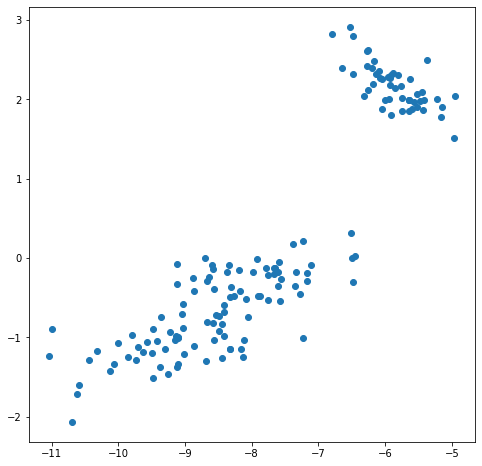

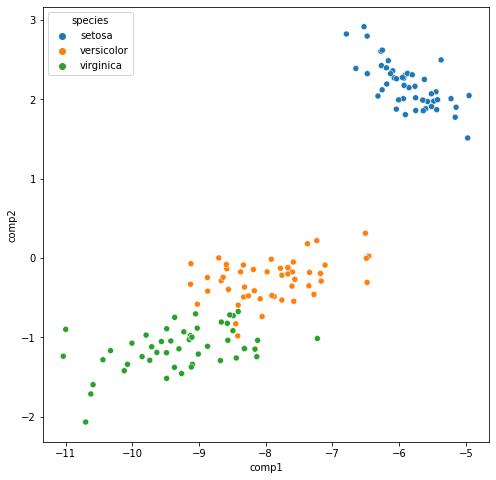

In [14]:
"""=============================================================================
   Ex4: SVD Demensionality Reduction
   Câu 1: 
      a) Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
      b) Phân tích SVD: U, s, VT từ dataframe, 
      c) Giảm chiều còn 2 components
      d) Trực quan hóa dữ liệu sau khi giảm chiều, có luôn cột 5 (species) 
============================================================================="""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## a) Đọc tập tin iris vào dataframe
# folder = 'Data/Bai 2/'
iris   = pd.read_csv('iris2.csv')
print('\n*** a) Dataframe iris.csv:')
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
print('         - Ma trận iris', iris.shape, ':')
print('                    ', iris.head())
print('\n         - Ma trận X', X.shape, ':')
print('         - 4 cột đầu tiên:\n', X.head())

## b) Phân tích SVD: U, s, VT
U, s, VT = np.linalg.svd(X)

print('\n*** b) Phân tích SVD:')
print('         - Ma trận U', U.shape, ':\n', U)
print('\n         - Eigenvalues:', s)
print('\n         - Ma trận VT', VT.shape, ':\n', VT)

## c) Giảm chiều còn 2 components
if (X.shape[0] == X.shape[1]):
    S = np.diag(s)
else:
    S = np.zeros_like(X)
    S[:X.shape[1], :X.shape[1]] = np.diag(s)

print('\n*** c) NEW dataframe (using only the first two components):')
## Chỉ sử dụng 2 components: S(n,  2); VT(2, n)
n_components = 2
S  =  S[:, :n_components]
VT = VT[:n_components, :]

## d) Trực quan hóa dữ liệu sau khi giảm chiều, có luôn cột 5 (species)
##    - Cột thứ 5 (species) chứa các giá trị: setosa, versicolor, virginica
##    - PCA: Chiếu vào không gian mới  
##      T_s1 = U.S = U.S.VT.V = X.V = T_s2
T_s1 = U.dot(S)
T_s1[0:5]

T_s2 = X.dot(VT.T)
T_s2[0:5]

## Visualization
## T_s2 có 2 columns, đặt tên là comp1, comp2
T_s2.columns = ["comp1", "comp2"]
## Bổ sung cột [iris.species] vào T_s2 --> T_s2(comp1, comp2, species)
T_s2["species"] = iris['species']

print('         - U.S', T_s2.shape, ': \n', U)
T_s2.head()

plt.figure(figsize = (8, 8))
plt.scatter(T_s2["comp1"], T_s2["comp2"])
plt.show()

plt.figure(figsize=(8, 8))
sns.scatterplot(x = "comp1", y = "comp2", data = T_s2, hue = "species")
plt.show()


In [15]:
"""=============================================================================
Ex4: SVD Demensionality Reduction
    Câu 2: 
        a) Tải dữ liệu digits từ dataset của sklearn
        b) Sử dụng TruncatedSVD để giảm chiều dữ liệu xuống 10 components
        c) Trực quan hóa dữ liệu sau khi giảm chiều
https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_on_sparse_feature_matrix/
============================================================================="""

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets

## a) Tải dữ liệu digits từ dataset của sklearn
digits = datasets.load_digits()
print('         - Matrix X', digits.data.shape, ': \n', digits.data, '\n')

## Standardize the feature matrix
X = digits.data

## Make sparse matrix
X_sparse = csr_matrix(X)
print('         - Sparse matrix', X_sparse.shape, ': \n', X_sparse, '\n')

## b) Phân tích Truncated SVD với k = 10: U, s, VT
tsvd = TruncatedSVD(n_components = 10)

## Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)

## Show results
print('Original number of features:', X_sparse.shape[1])
print('Reduced  number of features:', X_sparse_tsvd.shape[1])

print('         - X[0]: \n', X[0], '\n')
print('         - X[0]: \n', X_sparse_tsvd[0], '\n')

## View Percent Of Variance Explained By New Features
# Sum of 10 components' explained variance ratios
tsvd.explained_variance_ratio_[0:10].sum()

## 73% with 10 components

         - Matrix X (1797, 64) : 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

         - Sparse matrix (1797, 64) : 
   (0, 2)	5.0
  (0, 3)	13.0
  (0, 4)	9.0
  (0, 5)	1.0
  (0, 10)	13.0
  (0, 11)	15.0
  (0, 12)	10.0
  (0, 13)	15.0
  (0, 14)	5.0
  (0, 17)	3.0
  (0, 18)	15.0
  (0, 19)	2.0
  (0, 21)	11.0
  (0, 22)	8.0
  (0, 25)	4.0
  (0, 26)	12.0
  (0, 29)	8.0
  (0, 30)	8.0
  (0, 33)	5.0
  (0, 34)	8.0
  (0, 37)	9.0
  (0, 38)	8.0
  (0, 41)	4.0
  (0, 42)	11.0
  (0, 44)	1.0
  :	:
  (1796, 27)	16.0
  (1796, 28)	16.0
  (1796, 29)	10.0
  (1796, 34)	12.0
  (1796, 35)	15.0
  (1796, 36)	15.0
  (1796, 37)	12.0
  (1796, 41)	4.0
  (1796, 42)	16.0
  (1796, 43)	6.0
  (1796, 44)	4.0
  (1796, 45)	16.0
  (1796, 46)	6.0
  (1796, 49)	8.0
  (1796, 50)	16.0
  (1796, 51)	10.0
  (1796, 52)	8.0
  (1796, 53)	16.0
  (1796, 54)	8.0
  (1796, 57)	1.0
  (1796, 58)	8.0
 

0.7324265037177062


*** a) Load dữ liệu các khuôn mặt: sklearn.datasets.fetch_lfw_people:
['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)

*** b) Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150:
PCA.Components:
 [[-0.00467902 -0.00549966 -0.00664058 ... -0.00933706 -0.00779144
  -0.0067299 ]
 [ 0.01621422  0.01505316  0.01508304 ... -0.03526616 -0.03415551
  -0.03252562]
 [ 0.02832955  0.02735484  0.02670202 ...  0.04293805  0.03990206
   0.03724964]
 ...
 [-0.02065566 -0.02206482 -0.01886089 ...  0.01907869  0.01988375
   0.01549997]
 [-0.03030289 -0.02756995 -0.01677063 ...  0.0296887   0.01902969
   0.00543173]
 [ 0.04832296  0.04445689  0.03428946 ...  0.02239198  0.02918823
   0.02524

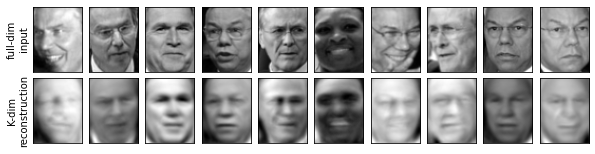

In [16]:
"""=============================================================================
Ex3: PCA - sklearn
    a) Load dữ liệu các khuôn mặt: 'sklearn.datasets.fetch_lfw_people'
       (lấy min_faces_per_person = 60)
    b) Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150
    c) Trực quan hóa dữ liệu gốc và sau khi giảm chiều
============================================================================="""
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

##------------------------------------------------------------------------------
print('\n*** a) Load dữ liệu các khuôn mặt: sklearn.datasets.fetch_lfw_people:')
##------------------------------------------------------------------------------
from sklearn.datasets import fetch_lfw_people
m = 40       # 60
faces = fetch_lfw_people(min_faces_per_person = m)
type(faces)

print(faces.target_names)
print(faces.images.shape)

faces.images[0].shape
faces.data[0].size

##------------------------------------------------------------------------------
print('\n*** b) Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150:')
##------------------------------------------------------------------------------
k = 40       # 150
pca = PCA(k)
pca.fit(faces.data)

# access values and vectors
# components_ : array, shape (n_components, n_features)
# Các trục chính trong không gian feature, biểu thị
# các hướng của phương sai tối đa trong dữ liệu
# explained_variance_ : array, shape (n_components,)
# Số lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.Components:\n', pca.components_)
print('PCA.Shape: ', pca.components_.shape)
print('PCA.Explained variance: ', pca.explained_variance_)
print('PCA.Explained variance shape: ', pca.explained_variance_.shape)
print(sum(pca.explained_variance_ratio_))

# transform data
components = pca.transform(faces.data)
projected  = pca.inverse_transform(components)

##------------------------------------------------------------------------------
print('\n*** c) Trực quan hóa dữ liệu:')
##------------------------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(2, 10, figsize = (10, 2.5), 
                              subplot_kw  = {'xticks':[], 'yticks':[]},
                              gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i in range(10):
   ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap = 'binary_r')
   ax[1, i].imshow(projected[i].reshape(62, 47),  cmap='binary_r')
   ax[0, 0].set_ylabel('full-dim\ninput')
   ax[1, 0].set_ylabel('K-dim\nreconstruction')
    